In [1]:
# importing all the required library for importing data, exploratory data analysis.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import os
os.chdir("f:\\BANK_Loan_edwisor") # creating working directory

In [2]:
os.getcwd() # Confirming the working directory is set.

'f:\\BANK_Loan_edwisor'

In [3]:
os.listdir("f:\\Bank_Loan_edwisor") #Listing the data available in the working directory

['bank-loan.csv',
 'Bank_loan_project report.docx',
 'Bank_output.csv',
 'Decision Tree.csv',
 'Deployment Instruction.docx',
 '~$nk_loan_project report.docx']

In [4]:
bank_data = pd.read_csv("bank-loan.csv") 

# Reading the "csv" file using pandas and saving it in the variable ba_da.

In [5]:
bank_data.head(5) # printing first few 10 lines to see the contents of the file.

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [6]:
#bank_data['othdebt'].max()
bank_data['othdebt'].min()
#bank_data['creddebt'].min()
#bank_data['creddebt'].max()
#bank_data['address'].unique()
# it can be seen that the continuous variabels values vary largely. So they need to be normalized before modeling.

0.045584

In [7]:
bank_data.tail(5) # printing first few 07 lines to see the contents of the file. 

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [8]:
bank_data["default"].unique()

array([ 1.,  0., nan])

# We can observe from the last few datapoints that there are "missing values" present in the data set.

In [9]:
missing_values = pd.DataFrame(bank_data.isnull().sum()) #calculating missing values of the data frame and saving in a new data frame.
missing_values = missing_values.reset_index() # Reset index of the data frame to make ti more readable.
missing_values = missing_values.rename(columns = {"index": "Variable", 0:"Missing Values"}) # rename the column names to understand the data appropriately.
missing_values

,Variable,Missing Values
0,age,0
1,ed,0
2,employ,0
3,address,0
4,income,0
5,debtinc,0
6,creddebt,0
7,othdebt,0
8,default,150


In [10]:
bank_data['ed'].unique()
#bank_data['default'].value_counts()

array([3, 1, 2, 4, 5], dtype=int64)

In [11]:
# As variable "default" has two levels 0 and 1, and is categorical. The mode of the variable is 0.0 as calculated above. So filling the  missing values with 0.
bank_data['default'] = bank_data['default'].fillna(0)

In [12]:
bank_data.isnull().sum() # all the missing values have been replaced by 0.0.

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [13]:
bank_data.shape # Checking te structure of the dataset

(850, 9)

In [14]:
bank_data.describe() # obtaining the statistical information of each variable in the raw data.

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.215294
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.411268
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,0.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000



It can be observed that "standarad deviation" of the variable 'income' is understandably higher than the rest of the variable. There is a good chance that outliers are present in the variable.


In [15]:
bank_data.dtypes # checking the data types of all the variables

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [16]:
bank_data["ed"] = bank_data["ed"].astype("category")

# Feature Selection of continuous variables

In [17]:
num_var = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
cat_var = ["ed"]

In [18]:
df_corr = bank_data.loc[:,num_var]

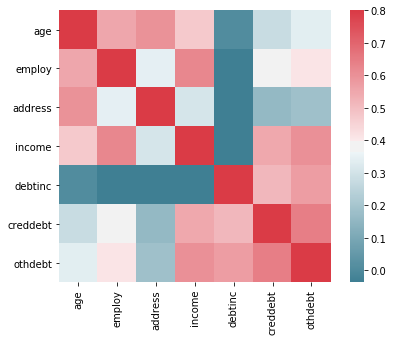

In [19]:
f, ax = plt.subplots(figsize =(7,5))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax = 0.8,
            square=True, ax=ax)

It can be inferred from the correlation plot for the continuous variables that, the variables are not hihgly correlated to eac other.
Though we can say that variiables "crddebt" and "othdebt" are  slightly positively correlated but still it may be a decidi9ng factor for person to stamp load default status. 

# Normality check and Normalization of all Continuous variables.

Text(0.5, 1.0, 'Normality check')

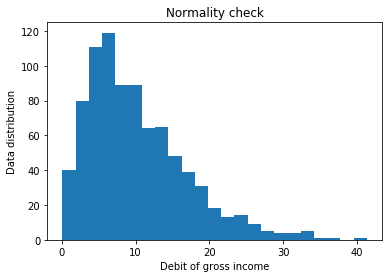

In [20]:
# Checking normality of continuous variable.
plt.hist(bank_data['debtinc'], bins = 'auto') # Each continuous variable has been checked, and it was found they are left skewed and not normally distributed.
plt.xlabel("Debit of gross income")
plt.ylabel("Data distribution")
plt.title("Normality check")
#check similarly for all the variables.
# ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [21]:
# Implementing Normalization technique on all the continuous variable.
for i in num_var:
    print(i)
    bank_data[i] = (bank_data[i] - min(bank_data[i]))  / (max(bank_data[i]) - min(bank_data[i]))

age
employ
address
income
debtinc
creddebt
othdebt


In [22]:
bank_data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.583333,3,0.515152,0.352941,0.376443,0.223301,0.552210,0.141188,1.0
1,0.194444,1,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518,0.0
2,0.555556,1,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405,0.0
3,0.583333,1,0.454545,0.411765,0.247113,0.067961,0.128811,0.022067,0.0
4,0.111111,2,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656,1.0


All the data has been transformed into normalized form. Each data points is normally distributed now and this will help in building the model more precise and efficient.

# Outliers analysis 

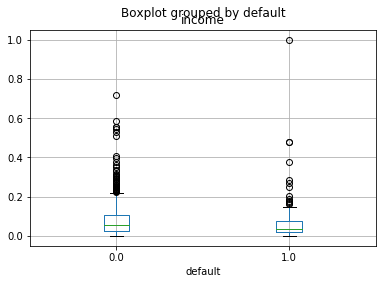

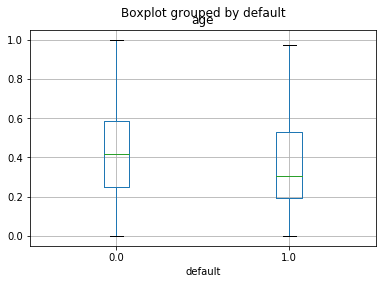

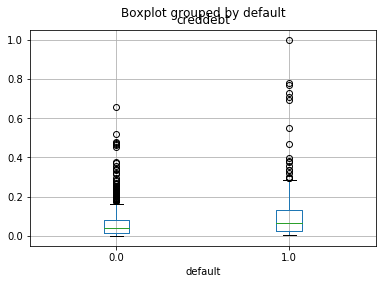

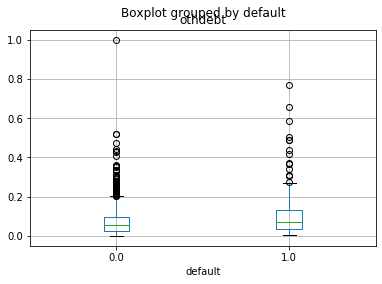

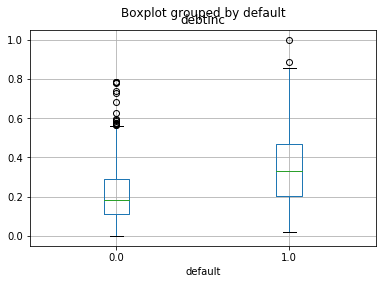

In [23]:
#Creating box plots for continuous variables especially for the variable income as standard deviation is very high.

#fig, ax = plt.subplots(figsize = (15,9))
#sns.set()
#sns.boxplot(data = bank_data[['income']])
#plt.show()
bank_data.boxplot('income','default')
bank_data.boxplot('age','default')
bank_data.boxplot('creddebt','default')
bank_data.boxplot('othdebt','default')
bank_data.boxplot('debtinc','default')

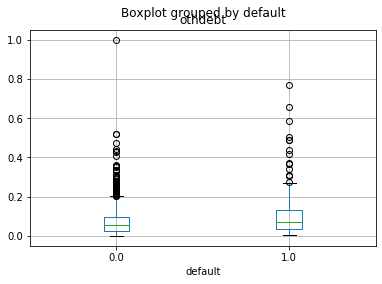

In [24]:
#fig, ax = plt.subplots(figsize = (15,9))
#sns.set()
#sns.boxplot(data = bank_data[['debtinc', 'creddebt', 'othdebt']])
#plt.show()
bank_data.boxplot('othdebt', 'default')

We can observe that all the continuous variable has outliers present in them.
Next,
We ill impute this outliers

In [25]:
bank_data.shape


(850, 9)

In [26]:
# Detection of outliers and droping them.
for i in num_var:
    print(i)
    q75, q25 = np.percentile(bank_data.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75 - q25 #Inter quantile range
    min = q25 - (iqr * 1.5) #inner fence
    max = q75 + (iqr * 1.5) #outer fence
    print(min)
    print(max)
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] < min].index)  #Replace with NA
    bank_data = bank_data.drop(bank_data[bank_data.loc[:,i] > max].index)
    

age
-0.25
1.0833333333333335
employ
-0.36363636363636354
0.8484848484848484
address
-0.3088235294117647
0.75
income
-0.07852193995381061
0.19861431870669743
debtinc
-0.19478155339805822
0.6547330097087378
creddebt
-0.07479060798903574
0.1684052496071216
othdebt
-0.059353663680807606
0.16696845201837646


In [27]:
bank_data.shape

(662, 9)

In [28]:
bank_data_scaled = bank_data.copy()
for i in num_var:
    bank_data_scaled[i] = (bank_data[i] - bank_data[i].mean()) / bank_data[i].std()

In [29]:
bank_data_scaled.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1,-0.865556,1,0.568715,-0.235184,-0.229880,1.618775,0.614717,1.545935,0.0
2,0.888382,1,1.482081,1.077285,1.191260,-0.605734,-0.054356,0.181770,0.0
4,-1.270311,2,-0.892671,-1.219536,-0.407522,1.618775,1.176854,0.842780,1.0
5,1.023301,2,-0.344651,-0.399242,-0.585165,0.280299,-0.666913,0.173113,0.0
7,1.293138,1,0.934062,0.585109,0.184619,-0.963918,-1.016050,-0.510425,0.0


In [30]:
bank_data_logit = pd.DataFrame(bank_data["default"])

In [31]:
bank_data_logit = bank_data_logit.join(bank_data[num_var])

In [32]:
bank_data_logit.head()

,default,age,employ,address,income,debtinc,creddebt,othdebt
1,0.0,0.194444,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518
2,0.0,0.555556,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405
4,1.0,0.111111,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656
5,0.0,0.583333,0.151515,0.147059,0.027714,0.245146,0.018541,0.060074
7,0.0,0.638889,0.363636,0.323529,0.057737,0.084951,0.005688,0.033962


In [33]:
temp = pd.get_dummies(bank_data["ed"], prefix = "ed", drop_first = True)

In [34]:
bank_data_logit = bank_data_logit.join(temp)

In [35]:
bank_data_logit.head(5)

,default,age,employ,address,income,debtinc,creddebt,othdebt,ed_2,ed_3,ed_4,ed_5
1,0.0,0.194444,0.303030,0.176471,0.041570,0.417476,0.065719,0.112518,0,0,0,0
2,0.0,0.555556,0.454545,0.411765,0.096998,0.131068,0.041090,0.060405,0,0,0,0
4,1.0,0.111111,0.060606,0.000000,0.034642,0.417476,0.086412,0.085656,1,0,0,0
5,0.0,0.583333,0.151515,0.147059,0.027714,0.245146,0.018541,0.060074,1,0,0,0
7,0.0,0.638889,0.363636,0.323529,0.057737,0.084951,0.005688,0.033962,0,0,0,0


In [36]:
bank_data_logit.shape

(662, 12)

# Applying Logistic Regression model

In [37]:
# AS the target variable has two classes as outputs we will use models used for classification problem.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [38]:
x_features = bank_data_logit.drop('default', axis = 1) # Getting all the conitnuos feature or the predictor variables.
y_target = bank_data_logit['default'] # getting the target variable.

In [39]:
#Validating extraction.
#x_features.shape
y_target

1      0.0
2      0.0
4      1.0
5      0.0
7      0.0
      ... 
844    0.0
845    0.0
847    0.0
848    0.0
849    0.0
Name: default, Length: 662, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state = 42)

In [41]:
y_test.shape

(199,)

In [42]:
logreg = LogisticRegression() #Creating the classifier

In [43]:
MSE_logreg = - cross_val_score(logreg, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [44]:
MSE_logreg.mean()

0.19227567067530066

In [45]:
logreg.fit(X_train, y_train) #fitting the data into the logistic model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = logreg.predict(X_test) # predicting values for test data set
x_pred = logreg.predict(X_train) # predicting values for train data set

In [47]:
print('LogisticRegression MSE: {:.2f}'.format(MSE_logreg.mean())) # MSE of Logistic Regression
print('Train MSE: {:.2f}'.format(MSE(y_train, x_pred))) # MSE of Train
print('Test MSE: {:.2f}'.format(MSE(y_test, y_pred))) # MSE of Test

LogisticRegression MSE: 0.19
Train MSE: 0.19
Test MSE: 0.22


In [48]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Confusion Matrix

In [49]:
print(confusion_matrix(y_test, y_pred)) # printing the confusion matrix
print(classification_report(y_test, y_pred)) # Printing the metrics such as accuracy, precision, recall.
print(X_train.shape) 
print(y_train.shape)

[[153   0]
 [ 44   2]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       153
         1.0       1.00      0.04      0.08        46

    accuracy                           0.78       199
   macro avg       0.89      0.52      0.48       199
weighted avg       0.83      0.78      0.69       199

(463, 11)
(463,)


In [50]:
print("Accuracy = ",(153+2)/(153+0+2+44))
print("FNR = ",44/(44+2))

Accuracy =  0.7788944723618091
FNR =  0.9565217391304348


Plotting the ROC curve for the predicted probabilities.

In [51]:
y_pred_prob = logreg.predict_proba(X_test)[:,1] # Computing predicted probabilities.
y_pred_prob

array([0.15432827, 0.18058715, 0.20974502, 0.09969298, 0.24652584,
       0.28340688, 0.04747634, 0.24899034, 0.31157937, 0.18371115,
       0.2270048 , 0.38668113, 0.13122975, 0.10198513, 0.06041052,
       0.20302096, 0.30084086, 0.25867771, 0.02836333, 0.13277915,
       0.09086815, 0.32085743, 0.0433918 , 0.45281603, 0.14831003,
       0.14816921, 0.09388461, 0.09806929, 0.17459194, 0.31328456,
       0.29074293, 0.27714976, 0.30370656, 0.22957231, 0.16692662,
       0.27995562, 0.05742687, 0.37055616, 0.17854265, 0.10303787,
       0.15561331, 0.10550029, 0.14995714, 0.1445925 , 0.11476791,
       0.37478291, 0.2092675 , 0.2064911 , 0.04794373, 0.10749835,
       0.33950436, 0.08246258, 0.50282353, 0.29673636, 0.04560994,
       0.14074159, 0.05080902, 0.25048659, 0.19716742, 0.07536488,
       0.40899033, 0.03742638, 0.4879905 , 0.32759853, 0.19611386,
       0.16702595, 0.34328477, 0.27721417, 0.35684607, 0.17148563,
       0.02531836, 0.2380948 , 0.39534686, 0.20306757, 0.11634

In [52]:
#computing roc curve values such as fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting ROC Curve

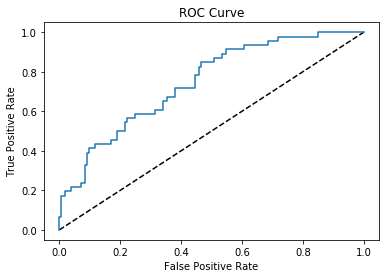

In [53]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

 # Model Accuracy

In [54]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
roc_auc_score(y_test, y_pred_prob) # checking the area under the curve of ROC for understanding model performance.

0.7452401250355215



This shows that the model is 75% accurate for the dataset. It is a good score to understand that model is good.


# # Precision Recall Curve

In [55]:
# calculating values for precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 

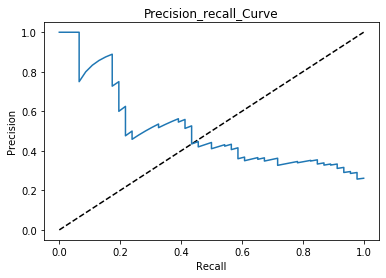

In [56]:
# plotting precision recall curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_recall_Curve')
plt.show()

# Applying Decision Tree Classifier

In [57]:
# Import the required libraries for decision tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
# Fitting the decision tree with parameters.
# max_dept (setting it to 4 at first to check the model behaviour.)
# criterion for decision tree to build up by using entropy.
dt = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy', random_state = 42)



In [59]:
# Doing cross validation of the train data.
# Also calculating "Neg- mean squared error." as CV doesn't allow + MSE
MSE_cv = - cross_val_score(dt, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [60]:
# Checking MSE_cv
MSE_cv 

array([0.17021277, 0.17021277, 0.17021277, 0.13043478, 0.13043478,
       0.15217391, 0.15217391, 0.2173913 , 0.17391304, 0.26086957])

In [61]:
# Fitting the model on the training data set.
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
y_pred_train = dt.predict(X_train) #predict labels of training data
y_pred_test = dt.predict(X_test) #predict labels of test data

In [63]:
y_pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
print(confusion_matrix(y_test, y_pred_test)) # printing the confusion matrix
print(classification_report(y_test, y_pred_test)) # Printing the metrics such as accuracy, precision, recall.

[[145   8]
 [ 34  12]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       153
         1.0       0.60      0.26      0.36        46

    accuracy                           0.79       199
   macro avg       0.71      0.60      0.62       199
weighted avg       0.76      0.79      0.76       199



In [65]:
print("Accuracy = ",(145+12)/(145+12+8+34))
print("FNR =" , 34/(34+12))

Accuracy =  0.7889447236180904
FNR = 0.7391304347826086


In [66]:
# Printing MSE values of cross validation, train data and test data w.r.t to predictions
from sklearn.metrics import mean_squared_error as MSE
print('Cross_validation MSE: {:.2f}'.format(MSE_cv.mean())) # MSE of CV
print('Train MSE: {:.2f}'.format(MSE(y_train, y_pred_train))) # MSE of Train
print('Test MSE: {:.2f}'.format(MSE(y_test, y_pred_test))) # MSE of Test

Cross_validation MSE: 0.17
Train MSE: 0.16
Test MSE: 0.21


It can be seen that Cross_validation MSE is > MSE of Train. (max_Depth = 4)

            Cross_validation MSE: 0.20
            Train MSE: 0.14
            Test MSE: 0.25
            
This implies that that data points are overfitting in the model.

Now we will check with changing the complexity such as max_depth = 3 of the decision tree, to improve the model.

            Cross_validation MSE: 0.19
            Train MSE: 0.16
            Test MSE: 0.22
 
 Now Cross_validation MSE is = MSE of Train > Test MSE
 
 Now we will check with changing the complexity such as max_depth = 2 of the decision tree, to improve the model.

            Cross_validation MSE: 0.17
            Train MSE: 0.16
            Test MSE: 0.21



In [67]:
accuracy_score(y_test, y_pred_test)
# Accuracy score when max_depth of the tree is 4 = 0.7914438502673797 = 75%
# Accuracy score when max_depth of the tree is 3 = 0.7967914438502673 = 78%
# Accuracy score when max_depth of the tree is 2 = 0.8021390374331551 = 79%

0.7889447236180904

In [68]:
y_pred_prob_DT = dt.predict_proba(X_test)[:,1] # Computing predicted probabilities.

In [69]:
y_pred_prob_DT

array([0.05839416, 0.05839416, 0.30612245, 0.05839416, 0.30612245,
       0.30612245, 0.05839416, 0.05839416, 0.63829787, 0.30612245,
       0.05839416, 0.30612245, 0.05839416, 0.05839416, 0.05839416,
       0.30612245, 0.30612245, 0.30612245, 0.05839416, 0.05839416,
       0.27272727, 0.63829787, 0.05839416, 0.30612245, 0.05839416,
       0.05839416, 0.05839416, 0.05839416, 0.30612245, 0.30612245,
       0.30612245, 0.05839416, 0.30612245, 0.05839416, 0.05839416,
       0.63829787, 0.05839416, 0.27272727, 0.05839416, 0.05839416,
       0.05839416, 0.05839416, 0.05839416, 0.05839416, 0.05839416,
       0.30612245, 0.30612245, 0.27272727, 0.05839416, 0.27272727,
       0.63829787, 0.05839416, 0.63829787, 0.63829787, 0.05839416,
       0.05839416, 0.05839416, 0.30612245, 0.30612245, 0.05839416,
       0.30612245, 0.05839416, 0.63829787, 0.30612245, 0.63829787,
       0.30612245, 0.63829787, 0.30612245, 0.30612245, 0.27272727,
       0.05839416, 0.05839416, 0.63829787, 0.27272727, 0.30612

In [70]:
#computing roc curve values such as fpr, tpr, thresholds
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_DT)

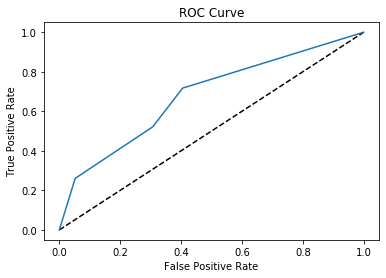

In [71]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [72]:
roc_auc_score(y_test, y_pred_prob_DT) # checking the area under the curve of ROC for understanding model performance.

0.6780335322534812

In [73]:
# calculating values for precision, recall
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, y_pred_prob_DT)

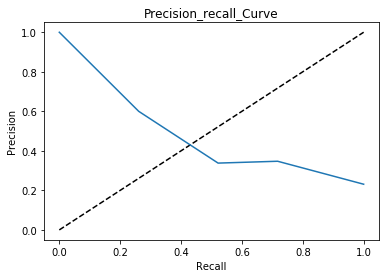

In [74]:
# plotting precision recall curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(recall_1, precision_1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_recall_Curve')
plt.show()

In [75]:
result=pd.DataFrame(y_test)
result['default'] = (y_pred_test)

result.to_csv("Decision Tree.csv",index=False)

In [76]:
Bank_df1 = pd.DataFrame(X_test)
Bank_df2 = pd.DataFrame(y_pred_test)
Bank_predictions = pd.merge(Bank_df1,Bank_df2,left_index=True,right_index=True)
Bank_predictions.to_csv('Bank_output.csv')